In [1]:
import pandas as pd
import numpy as np
import plotnine as p9
import glob


## 1. Use get_table.py to download specified year's transcript data

### Make sure to inspect the new data after running the script to avoid missing data issues

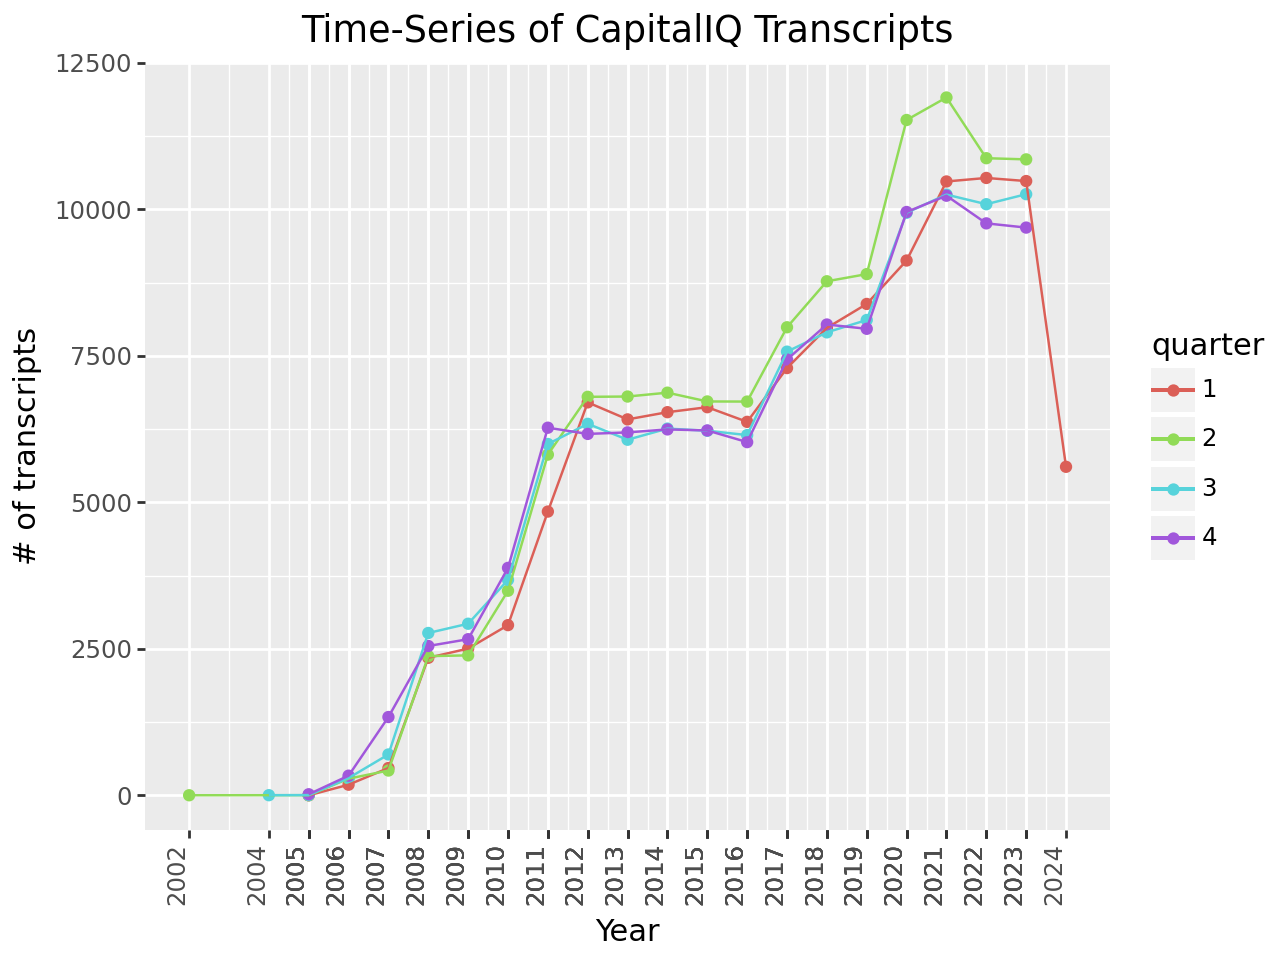

In [2]:
# download and import updated ciq_master file after
ciq_master = pd.read_csv('../data_ref/ciq_master.csv')

# create copy for plotting purposes
ciq_master_plot = ciq_master[['event_date', 'transcriptid']].copy()

# add year column
ciq_master_plot['Year'] = pd.to_datetime(ciq_master_plot.event_date).dt.year
# add quarter column
ciq_master_plot['quarter'] = pd.to_datetime(ciq_master_plot.event_date).dt.quarter

# create long dataset for plotting
ciq_long = ciq_master_plot.groupby(['Year', 'quarter']).agg(transcripts = ('transcriptid', 'size')).reset_index()

(
    p9.ggplot(ciq_long, p9.aes(x='Year', y='transcripts', color='factor(quarter)', group='quarter'))
    + p9.geom_point()
    + p9.geom_line() 
    + p9.scale_x_continuous(name='Year', breaks = ciq_long.Year)
    + p9.scale_y_continuous(name='# of transcripts', limits=[ciq_long.transcripts.min(), ciq_long.transcripts.max()])
    + p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=1))
    + p9.ggtitle('Time-Series of CapitalIQ Transcripts')
    + p9.labs(color='quarter')
)